# QUESTION 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)


In [18]:
movu = pd.read_csv("mov_data.csv")
movu.head(2)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742


In [171]:
mov1 = pd.read_excel("mov_data1.xlsx")
mov1.columns = [' item_id ', ' movie title ', ' release date ', ' IMDb URL ',
       ' unknown ', ' Action ', ' Adventure ', ' Animation ', "Children's ",
       ' Comedy ', ' Crime ', ' Documentary ', ' Drama ', ' Fantasy ',
       'Film-Noir ', ' Horror ', ' Musical ', ' Mystery ', ' Romance ',
       ' Sci-Fi ', 'Thriller ', ' War ', ' Western ']

mov1.head(2)

,item_id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [182]:
#number of movies
w = pd.unique(mov1[' item_id '])
w.shape

(1682,)

total movie is 1682

In [24]:
#total number of ratings
no_rat = movu[[' rating ']].count()
no_rat

 rating     100000
dtype: int64

Total number of ratings 100000

In [27]:
d = pd.unique(movu['user_id '])
d.shape

(943,)

Number of users who rated is 943

# QUESTION 2

Five point summary of rating attribute

In [32]:
s = movu.describe()
s[[' rating ']]

,rating
count,100000.000000
mean,3.529860
std,1.125674
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


# QUESTION 3

Rating attribute as histogram

C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


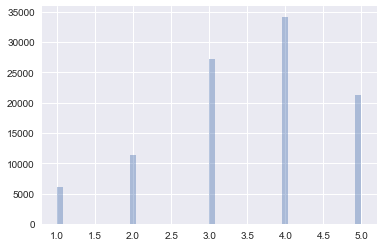

In [35]:
rat = movu[[' rating ']]
sns.distplot(rat, kde = False)

# QUESTION 5

In [165]:
#Movie has 100 ratings
t = movu[' item_id ']
mov100 = movu.groupby(t)
mor100 = mov100.count()
mor100 = mor100[[' rating ']]
a = mor100[[' rating ']] >= 100
mor100 = mor100[a]
mor100 = mor100.dropna()
mor100.shape




(338, 1)

From the above code we can understand that there are 338 movies which has atleast 100 ratings

In [108]:
#top ranked movies
top_n = mov100.mean()
a = top_n.reset_index(inplace=True)
b = mor100.reset_index(inplace=True)

In [114]:
mor100.shape

(338, 2)

In [115]:
top_n.shape

(1682, 4)

In [117]:
r = pd.merge(mor100,top_n,how = 'inner',on=' item_id ')

In [121]:
r.head(2)

,item_id,rating _x,user_id,rating _y,timestamp
0,1,452.0,477.011062,3.878319,8.828054e+08
1,2,131.0,492.007634,3.206107,8.834174e+08


In [125]:
final = r.sort_values(by=' rating _y', ascending=False)

In [131]:
top_mov = final[[' item_id ',' rating _y']]
top_mov.head(2)

,item_id,rating _y
232,408,4.491071
202,318,4.466443


In [181]:
fin1 = pd.merge(top_mov,mov1,how = 'inner',on=' item_id ')
fin1 = fin1.iloc[:,0:3]
fin1.head(5)


,item_id,rating _y,movie title
0,408,4.491071,"Close Shave, A (1995)"
1,318,4.466443,Schindler's List (1993)
2,169,4.466102,"Wrong Trousers, The (1993)"
3,483,4.456790,Casablanca (1942)
4,64,4.445230,"Shawshank Redemption, The (1994)"


The top rated movie is Close Shave, A (1995) 

# Question 4

In [133]:
mov1.head(2)

,movie id,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [144]:
mov12 = mov.iloc[:,4:]
mov12.head(2)

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [157]:
a = mov12.sum()
p = ['unknown ', ' Action ', ' Adventure ', ' Animation ', "Children's ",
       ' Comedy ', ' Crime ', ' Documentary ', ' Drama ', ' Fantasy ',
       'Film-Noir ', ' Horror ', ' Musical ', ' Mystery ', ' Romance ',
       ' Sci-Fi ', 'Thriller ', ' War ', ' Western ']

([<matplotlib.patches.Wedge at 0x7b1dfa6ef0>,
 [Text(1.1,0.00238904,'unknown '),
  Text(1.05809,0.300725,' Action '),
  Text(0.844097,0.705336,' Adventure '),
  Text(0.693814,0.853594,' Animation '),
  Text(0.531624,0.963004,"Children's "),
  Text(-0.193104,1.08292,' Comedy '),
  Text(-0.82147,0.731565,' Crime '),
  Text(-0.934943,0.579553,' Documentary '),
  Text(-1.05511,-0.311052,' Drama '),
  Text(-0.501039,-0.979265,' Fantasy '),
  Text(-0.451517,-1.00306,'Film-Noir '),
  Text(-0.32192,-1.05184,' Horror '),
  Text(-0.149449,-1.0898,' Musical '),
  Text(-0.0101534,-1.09995,' Mystery '),
  Text(0.351485,-1.04233,' Romance '),
  Text(0.711277,-0.839098,' Sci-Fi '),
  Text(0.972932,-0.513229,'Thriller '),
  Text(1.08988,-0.148857,' War '),
  Text(1.09953,-0.0322476,' Western ')])

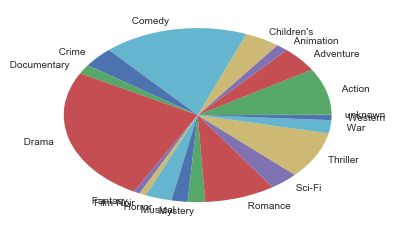

In [164]:
plt.pie(a, labels=('unknown ', ' Action ', ' Adventure ', ' Animation ', "Children's ",
       ' Comedy ', ' Crime ', ' Documentary ', ' Drama ', ' Fantasy ',
       'Film-Noir ', ' Horror ', ' Musical ', ' Mystery ', ' Romance ',
       ' Sci-Fi ', 'Thriller ', ' War ', ' Western '),)